## GOOGLE PLAY APPS
                                                                                    Author: Potey DOAHI

In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.

Let's take a look at the data, which consists of two files:

* apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

* user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [9]:
#Import Libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np
import os
os.chdir('D:\Personal Project\project2\The Android App Market on Google Play\datasets')
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in dataset
apps_with_duplicates = pd.read_csv('apps.csv')

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.count())

# Have a look at a random sample of 5 rows
print(apps.sample(5))

Total number of apps in the dataset =  Unnamed: 0        9659
App               9659
Category          9659
Rating            8196
Reviews           9659
Size              8432
Installs          9659
Type              9659
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64
      Unnamed: 0                                        App  \
3317        4187                                      HPlus   
988         1212  SarashpazPapion (Cooking with Chef Bowls)   
6754        7813                    Counter Online FPS Game   
1482        1825                      Lineage 2: Revolution   
4784        5768                              Amber Weather   

                Category  Rating  Reviews  Size     Installs  Type Price  \
3317  HEALTH_AND_FITNESS     2.9     1786   5.9     100,000+  Free     0   
988       FOOD_AND_DRINK     4.8     1250  13.0      50,000+  Free     0   
6754               

Missing data in columns "Rating" and "Size" / 
Special characters ('+', '$', ',') in columns "Installs" and "Price"

## Cleaning data

In [3]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char,''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


In [4]:
# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(np.float64)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(np.float64)

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


## EXPLORING APPS CATEGORIES

In [5]:
# Print the total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False) 
                                                               

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


There are 33 unique app categories in our dataset. Family and Game apps have the highest market prevalence followed by Tools, Business and Medical apps.

## Distribution of apps ratings

In [6]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


Ratings are a key performance indicator of an app. They influence discoverability in the app store.

The average ratings across all app categories is 4.17. The distribution is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

## Exploring size and price

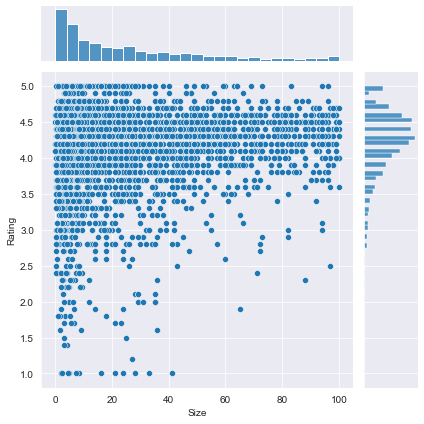

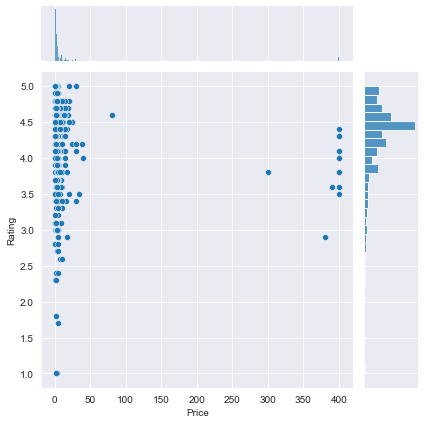

In [7]:
# Excluding missing values in columns 'Rating' and 'Size'
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
                                         

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

The larger the app, the more likely it may be difficult and/or expensive for users to download. Users might be discouraged by the Lengthy download times before experiencing the app. Users prefer their apps free or considerably low. 
* Majority of top rated apps (rating over 4) range from 2 MB to 20 MB. Majority of apps are priced at $10 or less

## Relation between app category and app price

Text(0.5, 1.0, 'App pricing trend across categories')

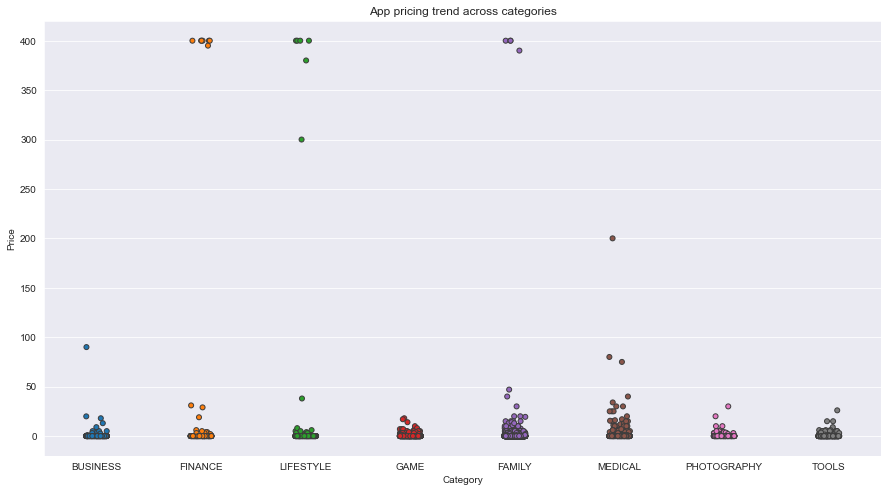

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories  
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

A bunch of apps are unreasonably priced at $200 or more. let's take a closer look

In [11]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


It looks like a bunch of the really expensive apps don't really have a purpose. Developers may create an app to test their skills or with malicious intent to make money by hoping people accidentally click purchase on their app in the store.

Let's filter out these junk apps and re-do our visualization

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

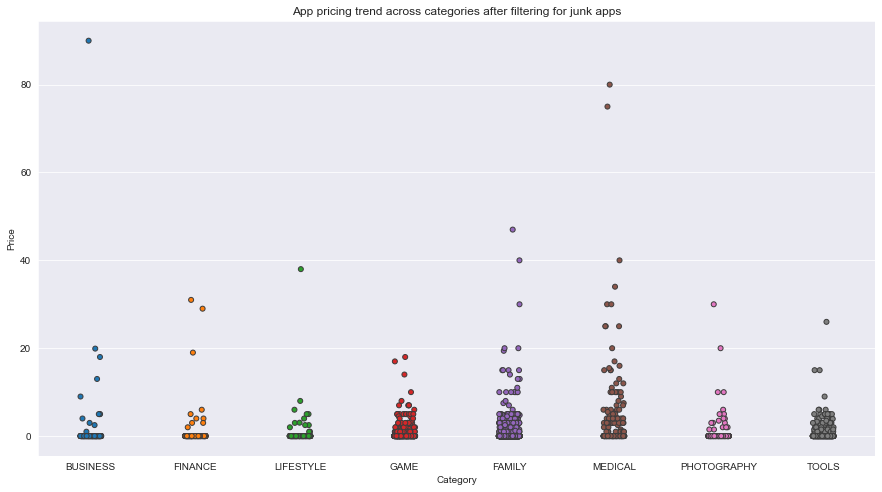

In [12]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Category', y = 'Price', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

Price range varies based on the category. Medical and Family apps are the most expensive. it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. 
All game apps are reasonably priced below $25. Some apps like the calculator (Tools app), should probably be free. 

## Popularity of paid apps vs free apps

In [13]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Free apps obviously have more installs compared to Paid apps. However the difference is surprisingly not as significant as expected!

## User reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

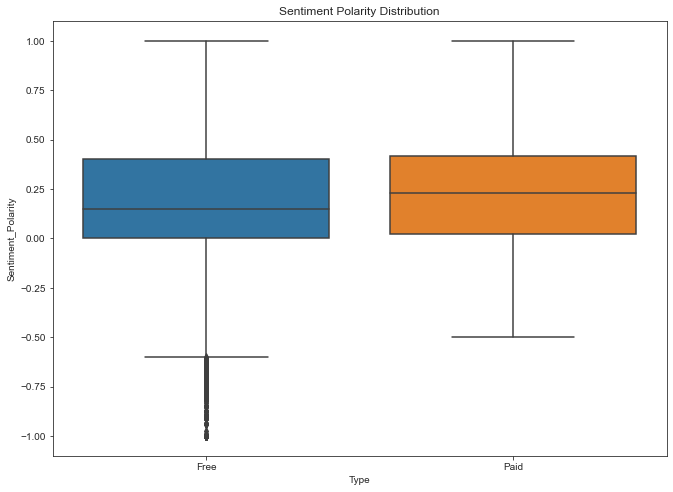

In [14]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

Free apps receive a lot of harsh comments compared to paid apps, as indicated by the outliers on the negative y-axis. The median polarity score for paid apps is a little higher than free apps, This may be an indication that paid apps have higher quality than free apps on average.